In [2]:
import sys
import re
import datetime
from math import log
import csv
import pprint
import math
import random
from collections import Counter
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from elasticsearch import Elasticsearch, helpers

from __future__ import division

%matplotlib inline

np.set_printoptions(threshold=sys.maxint)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_rows', 50)

pp = pprint.PrettyPrinter()

In [3]:
input_file = 'task_cms.csv'

In [4]:
df = pd.read_csv(input_file, dtype={'cpu_n': 'float'}, low_memory=False)

In [5]:
def tasktype2(row):
    task = row['task'].lower()
    ttype = row['tasktype'].lower()

    if ttype == 'analysis':
        tt = 'Analysis'
    elif 'cleanupunmerged' in ttype:
        tt = 'Cleanup'
    elif 'logcollect' in ttype:
        tt = 'LogCollect'
    elif ttype == 'repack':
        tt = 'Repack'
    elif ttype.startswith('skim'):
        tt = 'Skim'
    elif 'harvest' in ttype:
        tt = 'Harvesting'
    elif 'merge' in ttype:
        tt = 'Merge'
    elif ttype.startswith('express'):
        tt = 'Express'
    elif ttype == 'alcaskim':
        tt = 'Alcaskim'
    elif 'gensim' in ttype:
        tt = 'GENSIM'
    elif ttype == 'montecarlofromgen':
        tt = 'GENSIM'
    elif ttype == 'gen':
        tt = 'GEN'
    elif ttype == 'reco':
        tt = 'RECO'
#    elif ttype == 'dataprocessing':
#        tt = 'RECO'
    elif ttype.startswith("reco"):
        tt = 'RECO'
    elif ttype.endswith("_0"):
        tt = 'DIGI'
    elif ttype.endswith("_1"):
        tt = 'DIGIRECO'
    elif ttype.startswith("digi"):
        tt = 'DIGI'
    elif ttype == 'steponeproc':
        tt = 'DIGI'
    elif ttype == 'steptwoproc':
        tt = 'DIGIRECO'
    elif ttype == 'stepthreeproc':
        tt = 'DIGIRECOMINIAOD'
    elif 'miniaod' in ttype:
        tt = 'MINIAOD'
    elif ttype == 'production':
        tt = 'GENSIM'
    elif 'hlt' in ttype:
        tt = 'RECO'
    elif "validation" in task:
        tt = "Validation"
    elif "relval" in task:
        tt = "RelVal"
    elif "fastsim" in task:
        tt = "FastSim"
    elif "premix" in task:
        tt = "Premix"
    elif "minbias" in task:
        tt = "MinBias"
    else:
        tt = "Other"

    return tt

In [6]:
df['jobtype'] = df.apply(lambda row: tasktype2(row), axis=1)

In [7]:
#t = 'GENSIM'

In [8]:
#df_a = df[df.jobtype == t].copy()

In [9]:
#t = 'gensim'

In [10]:
#df_a = df[df.tasktype == t].copy()

In [11]:
t = 'analysis'

In [12]:
df_a = df[df.type == t]

In [13]:
df_a.sort_values('njobs', ascending=False).iloc[0]

task           170503_201021:kreis_crab_gsdr-to-miniaodg_high...
tasktype                                                analysis
site                                                  t1_us_fnal
cputype                intel(r) xeon(r) cpu e5-2670 v3 @ 2.30ghz
type                                                    analysis
exitcode                                                       0
njobs                                                        995
cpuevt_avg                                    15.505698922483846
cpuevt_rms                                    0.8581118444877638
wallevt_avg                                    66.56177350574289
wallevt_rms                                   3.6062790765087427
cpu                                            996035.9999999997
cpu_avg                                       1001.0412060301504
wc                                             4274167.999999997
wc_avg                                         4295.646231155776
cores                    

In [39]:
#df_a = df_a[df_a.task == '/vlimant_task_top-runiisummer15gs-00082__v1_t_160609_150723_1796/top-runiisummer15gs-00082_0/top-runiisummer15gs-00082_0mergerawsimoutput/top-runiispring16dr80-00029_0'].copy()

In [40]:
df_a[:10]

,task,tasktype,site,type,njobs,cpuevt_avg,cpuevt_rms,wallevt_avg,wallevt_rms,cpu,...,ramcore,input,input_avg,output,output_avg,inevt,outevt,inrate,outrate,jobtype
125192,160615_230923:afiqaize_crab_qcd15,analysis,t2_us_wisconsin,analysis,8094,0.505555,1.489652,1.712752,16.001713,15172212.0,...,1834.456255,2.879634e+07,3557.738912,0.000000,0.000000,0.787264,0.000000,2.799164,0.000000,Analysis
125193,160617_195326:gilvan_crab_hcalnzs,analysis,t2_us_wisconsin,analysis,8021,0.697633,1.467577,135.928254,318.225257,110636.0,...,34.310347,6.336738e+05,79.001850,21861.777821,2.725568,0.589856,0.014125,0.062721,0.002160,Analysis
125194,160616_231300:ccaputo_crab_dy1jetstoll_m-50,analysis,t2_us_wisconsin,analysis,5731,4.811187,0.684566,5.031176,1.112617,218509734.0,...,808.335154,2.114464e+06,368.951989,16148.339328,2.817718,0.046566,0.000356,0.009574,0.000073,Analysis
125195,160621_152347:piedra_crab_muoneg_run2016b-prom...,analysis,t2_us_wisconsin,analysis,5370,1.761427,0.282627,1.872795,0.951582,18268501.0,...,1110.362231,3.871068e+05,72.086925,11765.971435,2.191056,0.041009,0.001094,0.022539,0.000608,Analysis
125196,160621_152136:piedra_crab_doubleeg_run2016b-pr...,analysis,t2_us_wisconsin,analysis,5007,0.750880,0.135946,0.777324,0.287904,39305288.0,...,1138.261831,1.202131e+06,240.090010,21030.235007,4.200167,0.023243,0.000399,0.030931,0.000531,Analysis
125197,160613_100607:schhibra_crab_singlemuon_run2016...,analysis,t2_us_wisconsin,analysis,4647,5.854683,2.429403,8.246736,33.683705,26784084.0,...,1551.706397,2.747841e+06,591.315045,1688.036530,0.363253,0.622981,0.000375,0.088202,0.000055,Analysis
125198,160613_154206:afiqaize_crab_ele25,analysis,t2_us_wisconsin,analysis,4437,0.227908,0.090235,0.457183,5.581340,10655073.0,...,1083.908101,2.757949e+07,6215.795966,0.000000,0.000000,0.584490,0.000000,4.800048,0.000000,Analysis
125199,160627_112619:vischia_crab_data13tev_singlemuo...,analysis,t2_us_wisconsin,analysis,4359,0.014152,0.022322,0.132058,0.504599,656962.0,...,39.419843,1.048212e+06,240.470831,14515.457600,3.329997,0.021875,0.000291,0.195968,0.002717,Analysis
125200,160621_040138:kbutanov_crab_qcd_pt-20toinf_mue...,analysis,t2_us_wisconsin,analysis,4286,2.039475,0.432624,2.209331,0.747406,28901301.0,...,1109.805898,1.028923e+06,240.065947,23579.742939,5.501573,0.072746,0.001663,0.035069,0.000803,Analysis
125201,160628_052418:sundleeb_crab_run2_data_promptre...,analysis,t2_us_wisconsin,analysis,3976,0.016127,0.024270,0.089369,1.038713,1636136.0,...,869.574026,2.416517e+06,607.776026,19171.440198,4.821791,0.023072,0.000181,0.487549,0.003865,Analysis


In [41]:
# This function plots a histogram of df[var] with custom axis labels and printing avg and std

def make_plot(df, var, w_var=None, bins=100, rg=None, log=False, xlab=None, ylab=None, xunit=None, title=None):
    fig = plt.figure(figsize=(7,5))
    sp = plt.subplot(1, 1, 1)
    if w_var is None:
        mu = np.mean(df[var])
        sigma = np.std(df[var])
        if rg == 'auto':
            rg = [0., min(mu*11., mu+sigma*10.)]
        plt.hist(df[var], bins=bins, log=log, range=rg)
    else:
        mu = np.average(df[var], weights=df[w_var])
        sigma = math.sqrt(np.average((df[var] - mu)**2, weights=df[w_var]))
        if rg == 'auto':
            rg = [0., min(mu*10., mu+sigma*10.)]   # at least 10 times the average or at least 10 times the aver
        plt.hist(df[var], bins=bins, weights=df[w_var], log=log, range=rg)
    stats = r'$\mu=%.3f\pm%.3f\ %s$' % (mu, sigma, xunit)
    t_x = lambda x: sp.get_xlim()[0] + (sp.get_xlim()[1] - sp.get_xlim()[0]) * x
    t_y = lambda x: sp.get_ylim()[0] + (sp.get_ylim()[1] - sp.get_ylim()[0]) * x
    if log:
        if title: plt.text(t_x(.4), sp.get_ylim()[0] * (sp.get_ylim()[1] / sp.get_ylim()[0])**.9, title)
        plt.text(t_x(.4), sp.get_ylim()[0] * (sp.get_ylim()[1] / sp.get_ylim()[0])**.7, stats)
    else:
        plt.text(t_x(.4), t_y(.7), stats)
        plt.text(t_x(.4), t_y(.9), title)
    plt.xlabel(xlab + '(' + xunit + ')')
    plt.ylabel(ylab)

In [42]:
plt.rcParams.update({'font.size': 12})

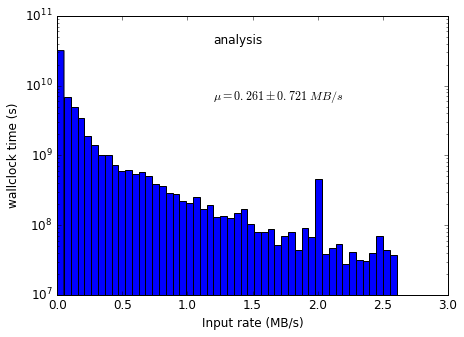

In [43]:
make_plot(df_a, 'inrate', w_var='wc', rg='auto', log=True, bins=50, xlab='Input rate ', ylab='wallclock time (s)', xunit='MB/s', title=t)

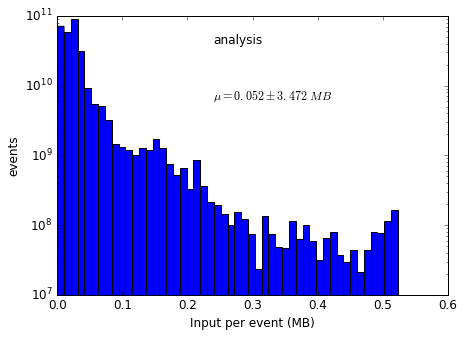

In [44]:
make_plot(df_a, 'inevt', w_var='evts', rg='auto', log=True, bins=50, xlab='Input per event ', ylab='events', xunit='MB', title=t)

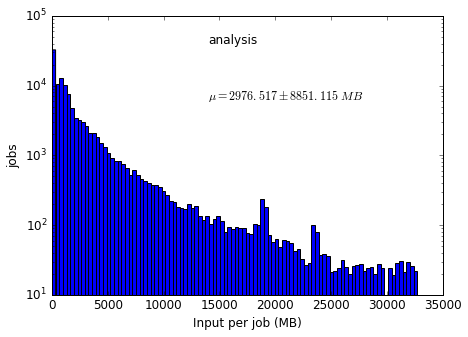

In [45]:
make_plot(df_a, 'input_avg', w_var=None, rg='auto', log=True, xlab='Input per job ', ylab='jobs', xunit='MB', title=t)

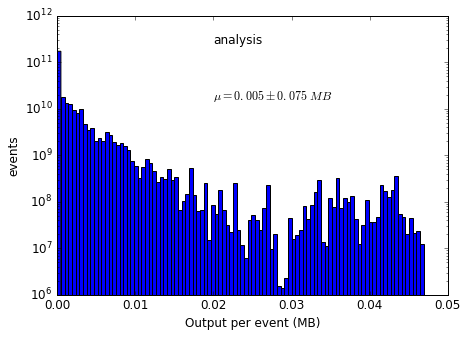

In [46]:
make_plot(df_a, 'outevt', w_var='evts', rg='auto', log=True, xlab='Output per event ', ylab='events', xunit='MB', title=t)

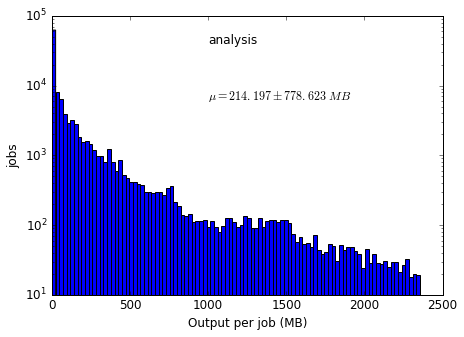

In [47]:
make_plot(df_a, 'output_avg', w_var=None, rg='auto', log=True, xlab='Output per job ', ylab='jobs', xunit='MB', title=t)

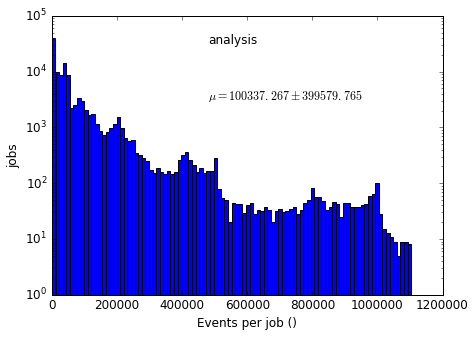

In [48]:
make_plot(df_a, 'evts_avg', w_var=None, rg='auto', log=True, xlab='Events per job ', ylab='jobs', xunit='', title=t)

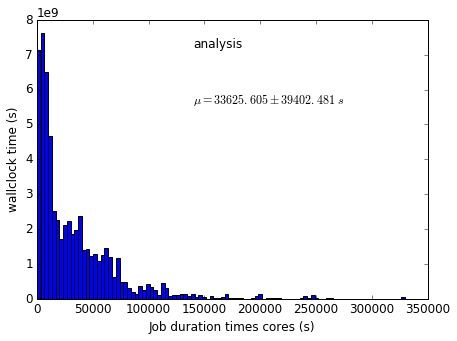

In [49]:
make_plot(df_a, 'wc_avg', w_var='wc', rg='auto', log=False, xlab='Job duration times cores ', ylab='wallclock time (s)', xunit='s', title=t)

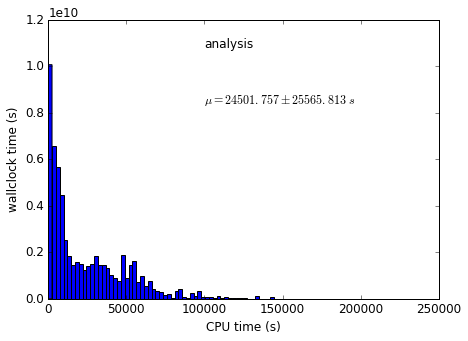

In [50]:
make_plot(df_a, 'cpu_avg', w_var='wc', rg='auto', log=False, xlab='CPU time ', ylab='wallclock time (s)', xunit='s', title=t)

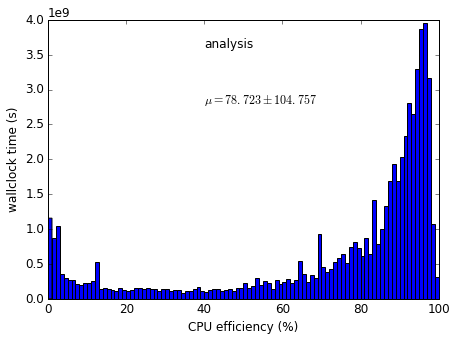

In [51]:
make_plot(df_a, 'eff', w_var='wc', rg=[0., 100.], log=False, xlab='CPU efficiency ', ylab='wallclock time (s)', xunit='%', title=t)

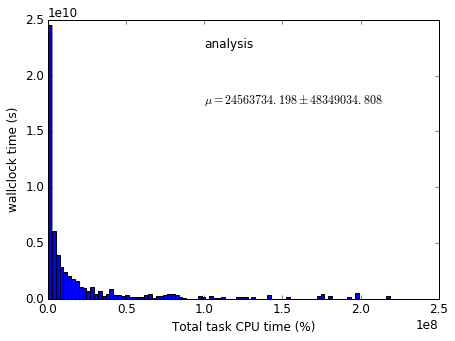

In [52]:
make_plot(df_a, 'cpu', w_var='wc', rg='auto', log=False, xlab='Total task CPU time ', ylab='wallclock time (s)', xunit='%', title=t)